###glass.csv

Preparación dataset

In [1]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

target = {"0": "Building windows float processed",
          "1": "Building windows non float processed",
          "2": "Vehicle windows float processed",
          "3": "Vehicle windows non float processed",
          "4": "Containers",
          "5": "Tableware",
          "6": "Headlamps"}

def curar_datos(dataset):
  long = len(dataset[0])
  dataset[:, long-1] -= 1     # Son 7 clases pero en el dataset solo figuran 6. Para que Keras lo interprete bien uso de 0 a 6.

curar_datos(dataset)
X = dataset[:, 0:9]
Y = dataset[:, 9]

####1) Varíen la cantidad de componentes principales con las que se quedan, para graficar el error cuadrático medio en función de la cantidad de componentes principales. Repita el mismo procedimiento para el porcentaje de energía.

Normalización sin varianza

In [2]:
n,dx=np.shape(X)
medias = np.mean(X,axis=0)
X0=X-medias


Matriz de covarianza y sus avas/aves

In [3]:
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

# Comprobación
j = 0
print(C @ ave[:,j])
print(ava[j] * ave[:,j] )

[-0.00277323 -0.05146748  2.16190863 -0.13844877  0.02298897  0.23427052
 -2.03098094 -0.22815629 -0.0027062 ]
[-0.00277323 -0.05146748  2.16190863 -0.13844877  0.02298897  0.23427052
 -2.03098094 -0.22815629 -0.0027062 ]


Error cuadrático medio para cada dimensión

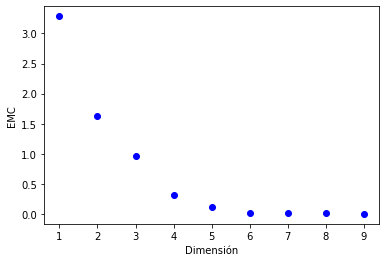

In [4]:
dims = list(np.arange(1,10))
ecm = []
for dim in range(1,dx+1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM = np.sum((X0-Xh)**2)/n
  ecm.append(ECM)

plt.scatter(dims, ecm, c= "blue")
plt.xlabel("Dimensión")
plt.ylabel("EMC")
plt.show()

Porcentajes de energía


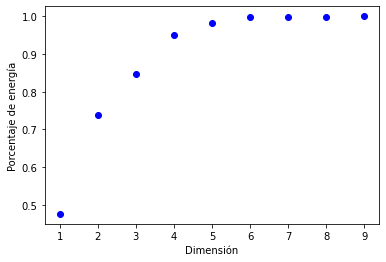

In [5]:

energia_autovalores = []
autovalores = []
for autovalor in ava:
  autovalores.append(autovalor)
  energia_autovalores.append(sum(autovalores) / sum(ava))

plt.scatter(dims, energia_autovalores, c= "blue")
plt.xlabel("Dimensión")
plt.ylabel("Porcentaje de energía")
plt.show()


Gráficos por dimensiones e histogramas

*1 Dimensión*

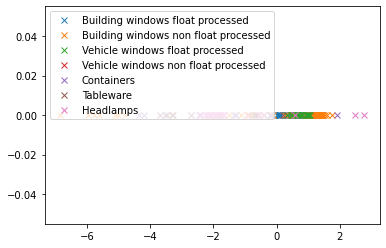

In [12]:
U=X0 @ ave[:,:1]
for name, label in [('Building windows float processed', 0), ('Building windows non float processed', 1), ('Vehicle windows float processed', 2),
                    ('Vehicle windows non float processed', 3), ('Containers', 4), ('Tableware', 5), ('Headlamps', 6)]:
  plt.plot(U[Y==label,0],np.zeros_like(U[Y==label,0]),'x',label=name) 
plt.legend()
plt.show()  


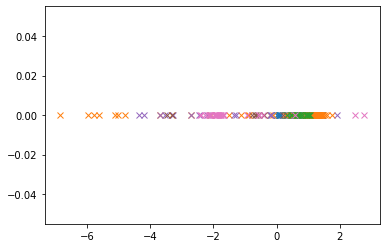

In [10]:
# Sin legend
U=X0 @ ave[:,:1]
for name, label in [('Building windows float processed', 0), ('Building windows non float processed', 1), ('Vehicle windows float processed', 2),
                    ('Vehicle windows non float processed', 3), ('Containers', 4), ('Tableware', 5), ('Headlamps', 6)]:
  plt.plot(U[Y==label,0],np.zeros_like(U[Y==label,0]),'x',label=name) 
plt.show()  


*2 Dimensiones*

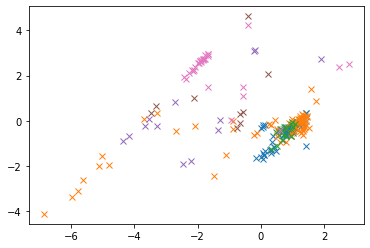

In [7]:
U=X0 @ ave[:,:2]
for name, label in [('Building windows float processed', 0), ('Building windows non float processed', 1), ('Vehicle windows float processed', 2),
                    ('Vehicle windows non float processed', 3), ('Containers', 4), ('Tableware', 5), ('Headlamps', 6)]:
  plt.plot(U[Y==label,0],U[Y==label,1],'x',label=name)
#plt.legend()  
plt.show()  

*3 Dimensiones*

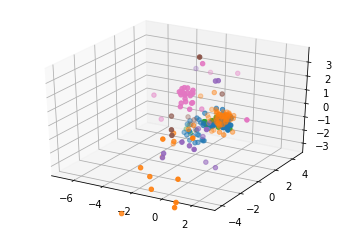

In [ ]:
U=X0 @ ave[:,:3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name, label in [('Building windows float processed', 0), ('Building windows non float processed', 1), ('Vehicle windows float processed', 2),
                    ('Vehicle windows non float processed', 3), ('Containers', 4), ('Tableware', 5), ('Headlamps', 6)]:
  ax.scatter(U[Y==label,0],U[Y==label,1],U[Y==label,2],'x',label=name)
#plt.legend()  
plt.show()  

####2) A partir de la componente principal, genere 5 datos sintéticos de vidrio (simular). Para ello estime la distribución de la componente principal mediante un histograma.

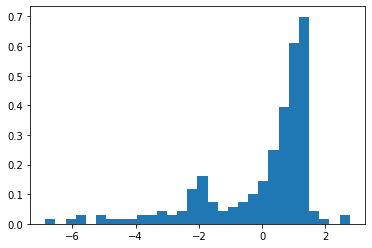

In [13]:
# Componente principal: primer autovector

U=X0 @ ave[:,:1]
plt.hist(U,bins=30,density=True)
plt.show()

Lo tomo como una distribución normal. Debo hallar el estimador de máxima verosimilitud 

In [14]:
from scipy.stats import norm

e_media, e_varianza = norm.fit(U)
# El estimador de la media de la normal es el promedio de las muestras
# El estimador de la varianza de la normal es el promedio de la diferencia entre las muestras y su promedio

# Genero 5 datos sintéticos
for i in range(5):
  print(np.random.randn() * np.square(e_varianza) + e_media)
 

1.6205348603829397
-0.13236997979581602
1.221741041533179
-2.9097210510491758
-0.21085378983351638
